# Дополнительное домашнее задание
## Проверка гипотезы о равномерности распределения генератора случайных чисел игры DOOM
### Щербаков Игорь, СКБ 171
---

Сгенерируем выборку из 4000 чисел генератора DooM. Посмотрим на то, как часто встречаются различные числа среди первых 500 элементов

In [21]:
import numpy as np
def read_integers(filename):
    with open(filename) as f:
        return [int(x) for x in f]


In [22]:
vals = read_integers("DoomGen4000.txt")

In [23]:
variance = sorted(vals[:500])

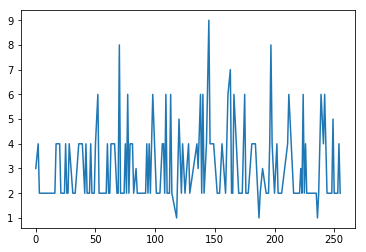

In [24]:
from collections import Counter
from matplotlib import pyplot as plt
occurances = Counter(variance)
lists = sorted(dict(occurances).items())
x, y = zip(*lists)
plt.plot(x,y)

Судя по графику, распределение похоже на равномерное, но не идеально

Согласно DooM Wiki и судя по комментариям кода, генератор Дума написан, чтобы выдавать значения похожие на выборку равномерно распределенной дискретной случайной величины $\xi \sim U(0,255)$ - это и будет гипотезой $H_0$

Попробуем последовательно применять для выборок разной длины Критерий хи-квадрат, начиная от 5 измерений на нескольких уровнях значимости. Остановимся, когда гипотеза начнет стабильно отклоняться (15 раз подряд)

In [25]:
def chi_discrete(dist, p1 = 0, p2 = 255):  #для выборки geom построить меру расхождения сhi^2
    
    chi = 0
    
    n = len(dist)

    do = dict(Counter(dist))

    m=255
    v = [0]*(m+1)
    p = [1./(p2-p1+1)]*(m+1)
    for key in do.keys():
        v[key]+=do[key]
    
    def correct_p_v(p, v):
        for i in range(len(v)):
            while (i < len(v)) and v[i] < 5:
                if (i+1) != len(v):
                    v[i] += v[i+1]
                    p[i] += p[i+1]
                    del v[i+1], p[i+1]
                else:
                    v[i-1] += v[i]
                    p[i-1] += p[i]
                    del v[i], p[i]
        return p, v
    p, v = correct_p_v(p, v)

    for i in range(0,len(v)):
        pi = p[i]
        chi += 1.0*(v[i] - n*pi)**2/(n*pi)
        #print(n*pi)
    return chi, len(v)+1

chi_discrete(vals[:6])

(0.0, 2)

In [26]:
from scipy.stats import chi2
def compute_quantile(cdf, a, eps=0.01, max_range=100):
    xx = np.arange(-1, max_range, eps)
    for x in xx:
        if cdf(x)<a and cdf(x+eps)>a:
            return x+eps

In [27]:
alphas = [0.05, 0.1]
for alpha in alphas:
    print("\n","+"*20,"Уровень значимости",alpha,"+"*20,"\n")
    counter = 0
    for i in range(6,2000):
        #print(chi_discrete(vals[:i]))
        #print("\n")
        chi, m = chi_discrete(vals[:i])
        chi = round(chi, 4)

        q = compute_quantile(chi2(m-1).cdf, 1-alpha)
        q = round(q, 4)

        if(chi < q):
            res = "Гипотеза H0 принимается! ( V )"
            counter = 0
        else:
            res = "Гипотеза H0 отклоняется! ( X )"
            counter += 1
        print("Выборка размера", len(vals[:i]),"Хи-квадрат = "+str(chi),"Квантиль("+str(alpha)+";"+str(m-1)+") = "+str(q)+"\t",res)
        if(counter==15):
            break


 ++++++++++++++++++++ Уровень значимости 0.05 ++++++++++++++++++++ 

Выборка размера 6 Хи-квадрат = 0.0 Квантиль(0.05;1) = 3.85	 Гипотеза H0 принимается! ( V )
Выборка размера 7 Хи-квадрат = 0.0 Квантиль(0.05;1) = 3.85	 Гипотеза H0 принимается! ( V )
Выборка размера 8 Хи-квадрат = 0.0 Квантиль(0.05;1) = 3.85	 Гипотеза H0 принимается! ( V )
Выборка размера 9 Хи-квадрат = 0.0 Квантиль(0.05;1) = 3.85	 Гипотеза H0 принимается! ( V )
Выборка размера 10 Хи-квадрат = 0.3044 Квантиль(0.05;2) = 6.0	 Гипотеза H0 принимается! ( V )
Выборка размера 11 Хи-квадрат = 0.4117 Квантиль(0.05;2) = 6.0	 Гипотеза H0 принимается! ( V )
Выборка размера 12 Хи-квадрат = 0.0083 Квантиль(0.05;2) = 6.0	 Гипотеза H0 принимается! ( V )
Выборка размера 13 Хи-квадрат = 0.074 Квантиль(0.05;2) = 6.0	 Гипотеза H0 принимается! ( V )
Выборка размера 14 Хи-квадрат = 0.2436 Квантиль(0.05;2) = 6.0	 Гипотеза H0 принимается! ( V )
Выборка размера 15 Хи-квадрат = 0.4029 Квантиль(0.05;3) = 7.82	 Гипотеза H0 принимается! ( V )
Вы

Выборка размера 91 Хи-квадрат = 10.131 Квантиль(0.05;17) = 27.59	 Гипотеза H0 принимается! ( V )
Выборка размера 92 Хи-квадрат = 10.2181 Квантиль(0.05;17) = 27.59	 Гипотеза H0 принимается! ( V )
Выборка размера 93 Хи-квадрат = 10.8244 Квантиль(0.05;17) = 27.59	 Гипотеза H0 принимается! ( V )
Выборка размера 94 Хи-квадрат = 9.1747 Квантиль(0.05;18) = 28.87	 Гипотеза H0 принимается! ( V )
Выборка размера 95 Хи-квадрат = 8.5707 Квантиль(0.05;18) = 28.87	 Гипотеза H0 принимается! ( V )
Выборка размера 96 Хи-квадрат = 9.28 Квантиль(0.05;18) = 28.87	 Гипотеза H0 принимается! ( V )
Выборка размера 97 Хи-квадрат = 10.5537 Квантиль(0.05;18) = 28.87	 Гипотеза H0 принимается! ( V )
Выборка размера 98 Хи-квадрат = 12.0493 Квантиль(0.05;19) = 30.15	 Гипотеза H0 принимается! ( V )
Выборка размера 99 Хи-квадрат = 11.7876 Квантиль(0.05;19) = 30.15	 Гипотеза H0 принимается! ( V )
Выборка размера 100 Хи-квадрат = 9.9814 Квантиль(0.05;19) = 30.15	 Гипотеза H0 принимается! ( V )
Выборка размера 101 Хи-ква

Выборка размера 175 Хи-квадрат = 45.4036 Квантиль(0.05;34) = 48.61	 Гипотеза H0 принимается! ( V )
Выборка размера 176 Хи-квадрат = 44.4988 Квантиль(0.05;34) = 48.61	 Гипотеза H0 принимается! ( V )
Выборка размера 177 Хи-квадрат = 46.1659 Квантиль(0.05;34) = 48.61	 Гипотеза H0 принимается! ( V )
Выборка размера 178 Хи-квадрат = 37.7258 Квантиль(0.05;34) = 48.61	 Гипотеза H0 принимается! ( V )
Выборка размера 179 Хи-квадрат = 35.9378 Квантиль(0.05;34) = 48.61	 Гипотеза H0 принимается! ( V )
Выборка размера 180 Хи-квадрат = 36.8725 Квантиль(0.05;34) = 48.61	 Гипотеза H0 принимается! ( V )
Выборка размера 181 Хи-квадрат = 35.9709 Квантиль(0.05;34) = 48.61	 Гипотеза H0 принимается! ( V )
Выборка размера 182 Хи-квадрат = 38.9362 Квантиль(0.05;34) = 48.61	 Гипотеза H0 принимается! ( V )
Выборка размера 183 Хи-квадрат = 38.2444 Квантиль(0.05;34) = 48.61	 Гипотеза H0 принимается! ( V )
Выборка размера 184 Хи-квадрат = 31.7604 Квантиль(0.05;34) = 48.61	 Гипотеза H0 принимается! ( V )
Выборка ра

Выборка размера 259 Хи-квадрат = 43.5623 Квантиль(0.05;46) = 62.83	 Гипотеза H0 принимается! ( V )
Выборка размера 260 Хи-квадрат = 45.0088 Квантиль(0.05;46) = 62.83	 Гипотеза H0 принимается! ( V )
Выборка размера 261 Хи-квадрат = 46.4366 Квантиль(0.05;46) = 62.83	 Гипотеза H0 принимается! ( V )
Выборка размера 262 Хи-квадрат = 49.7555 Квантиль(0.05;47) = 64.01	 Гипотеза H0 принимается! ( V )
Выборка размера 263 Хи-квадрат = 49.6791 Квантиль(0.05;47) = 64.01	 Гипотеза H0 принимается! ( V )
Выборка размера 264 Хи-квадрат = 49.6281 Квантиль(0.05;47) = 64.01	 Гипотеза H0 принимается! ( V )
Выборка размера 265 Хи-квадрат = 50.9867 Квантиль(0.05;47) = 64.01	 Гипотеза H0 принимается! ( V )
Выборка размера 266 Хи-квадрат = 51.2048 Квантиль(0.05;47) = 64.01	 Гипотеза H0 принимается! ( V )
Выборка размера 267 Хи-квадрат = 52.6123 Квантиль(0.05;47) = 64.01	 Гипотеза H0 принимается! ( V )
Выборка размера 268 Хи-квадрат = 52.171 Квантиль(0.05;47) = 64.01	 Гипотеза H0 принимается! ( V )
Выборка раз

Выборка размера 10 Хи-квадрат = 0.3044 Квантиль(0.1;2) = 4.61	 Гипотеза H0 принимается! ( V )
Выборка размера 11 Хи-квадрат = 0.4117 Квантиль(0.1;2) = 4.61	 Гипотеза H0 принимается! ( V )
Выборка размера 12 Хи-квадрат = 0.0083 Квантиль(0.1;2) = 4.61	 Гипотеза H0 принимается! ( V )
Выборка размера 13 Хи-квадрат = 0.074 Квантиль(0.1;2) = 4.61	 Гипотеза H0 принимается! ( V )
Выборка размера 14 Хи-квадрат = 0.2436 Квантиль(0.1;2) = 4.61	 Гипотеза H0 принимается! ( V )
Выборка размера 15 Хи-квадрат = 0.4029 Квантиль(0.1;3) = 6.26	 Гипотеза H0 принимается! ( V )
Выборка размера 16 Хи-квадрат = 0.1006 Квантиль(0.1;3) = 6.26	 Гипотеза H0 принимается! ( V )
Выборка размера 17 Хи-квадрат = 0.1228 Квантиль(0.1;3) = 6.26	 Гипотеза H0 принимается! ( V )
Выборка размера 18 Хи-квадрат = 1.8099 Квантиль(0.1;3) = 6.26	 Гипотеза H0 принимается! ( V )
Выборка размера 19 Хи-квадрат = 1.3362 Квантиль(0.1;3) = 6.26	 Гипотеза H0 принимается! ( V )
Выборка размера 20 Хи-квадрат = 4.2437 Квантиль(0.1;4) = 7.78

Выборка размера 96 Хи-квадрат = 9.28 Квантиль(0.1;18) = 25.99	 Гипотеза H0 принимается! ( V )
Выборка размера 97 Хи-квадрат = 10.5537 Квантиль(0.1;18) = 25.99	 Гипотеза H0 принимается! ( V )
Выборка размера 98 Хи-квадрат = 12.0493 Квантиль(0.1;19) = 27.21	 Гипотеза H0 принимается! ( V )
Выборка размера 99 Хи-квадрат = 11.7876 Квантиль(0.1;19) = 27.21	 Гипотеза H0 принимается! ( V )
Выборка размера 100 Хи-квадрат = 9.9814 Квантиль(0.1;19) = 27.21	 Гипотеза H0 принимается! ( V )
Выборка размера 101 Хи-квадрат = 12.1699 Квантиль(0.1;19) = 27.21	 Гипотеза H0 принимается! ( V )
Выборка размера 102 Хи-квадрат = 13.5114 Квантиль(0.1;19) = 27.21	 Гипотеза H0 принимается! ( V )
Выборка размера 103 Хи-квадрат = 10.5506 Квантиль(0.1;20) = 28.42	 Гипотеза H0 принимается! ( V )
Выборка размера 104 Хи-квадрат = 12.5026 Квантиль(0.1;20) = 28.42	 Гипотеза H0 принимается! ( V )
Выборка размера 105 Хи-квадрат = 11.5126 Квантиль(0.1;20) = 28.42	 Гипотеза H0 принимается! ( V )
Выборка размера 106 Хи-квадр

Выборка размера 180 Хи-квадрат = 36.8725 Квантиль(0.1;34) = 44.91	 Гипотеза H0 принимается! ( V )
Выборка размера 181 Хи-квадрат = 35.9709 Квантиль(0.1;34) = 44.91	 Гипотеза H0 принимается! ( V )
Выборка размера 182 Хи-квадрат = 38.9362 Квантиль(0.1;34) = 44.91	 Гипотеза H0 принимается! ( V )
Выборка размера 183 Хи-квадрат = 38.2444 Квантиль(0.1;34) = 44.91	 Гипотеза H0 принимается! ( V )
Выборка размера 184 Хи-квадрат = 31.7604 Квантиль(0.1;34) = 44.91	 Гипотеза H0 принимается! ( V )
Выборка размера 185 Хи-квадрат = 37.5663 Квантиль(0.1;35) = 46.06	 Гипотеза H0 принимается! ( V )
Выборка размера 186 Хи-квадрат = 38.9482 Квантиль(0.1;35) = 46.06	 Гипотеза H0 принимается! ( V )
Выборка размера 187 Хи-квадрат = 39.7179 Квантиль(0.1;35) = 46.06	 Гипотеза H0 принимается! ( V )
Выборка размера 188 Хи-квадрат = 40.0084 Квантиль(0.1;35) = 46.06	 Гипотеза H0 принимается! ( V )
Выборка размера 189 Хи-квадрат = 38.9334 Квантиль(0.1;35) = 46.06	 Гипотеза H0 принимается! ( V )
Выборка размера 190 

Выборка размера 264 Хи-квадрат = 49.6281 Квантиль(0.1;47) = 59.78	 Гипотеза H0 принимается! ( V )
Выборка размера 265 Хи-квадрат = 50.9867 Квантиль(0.1;47) = 59.78	 Гипотеза H0 принимается! ( V )
Выборка размера 266 Хи-квадрат = 51.2048 Квантиль(0.1;47) = 59.78	 Гипотеза H0 принимается! ( V )
Выборка размера 267 Хи-квадрат = 52.6123 Квантиль(0.1;47) = 59.78	 Гипотеза H0 принимается! ( V )
Выборка размера 268 Хи-квадрат = 52.171 Квантиль(0.1;47) = 59.78	 Гипотеза H0 принимается! ( V )
Выборка размера 269 Хи-квадрат = 56.2368 Квантиль(0.1;48) = 60.91	 Гипотеза H0 принимается! ( V )
Выборка размера 270 Хи-квадрат = 56.6397 Квантиль(0.1;48) = 60.91	 Гипотеза H0 принимается! ( V )
Выборка размера 271 Хи-квадрат = 49.9225 Квантиль(0.1;48) = 60.91	 Гипотеза H0 принимается! ( V )
Выборка размера 272 Хи-квадрат = 49.4906 Квантиль(0.1;48) = 60.91	 Гипотеза H0 принимается! ( V )
Выборка размера 273 Хи-квадрат = 49.8917 Квантиль(0.1;48) = 60.91	 Гипотеза H0 принимается! ( V )
Выборка размера 274 Х

С некого момента гипотеза откланяется стабильно, хи-квадрат растет быстрее квантиля

На уровне значимости $\alpha = 0.05$ необходимо 325 элементов выборки, чтобы отличить наше распределение от равномерного
На уровне значимости $\alpha = 0.1$ необходим 321 элемент выборки, чтобы отличить наше распределение от равномерного

